In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('../data/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<Axes: >

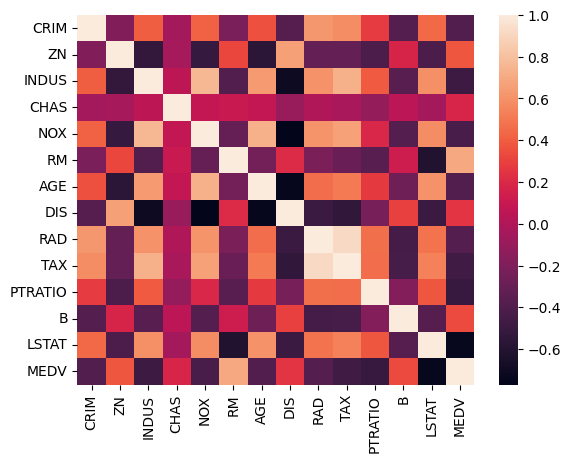

In [5]:
sns.heatmap(df.corr())

In [6]:
# pd.get_dummies
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_cleaned = df.dropna().shape
print("After removing missing values \n", df_cleaned)

# X = df.drop("Age", axis=1)
# y = df["Age"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

After removing missing values 
 (394, 14)


In [13]:
# mean_imp = df['Age'].fillna("mean")
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [14]:
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print(df.dtypes)
print(df.isnull().sum())

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [15]:
target = 'MEDV'
X = df.drop(columns=[target])
y = df[target]

In [19]:
from sklearn.impute import SimpleImputer
nums_cols = X.select_dtypes(include=[np.number]).columns.tolist()
imputer = SimpleImputer(strategy='median')
X[nums_cols] = imputer.fit_transform(X[nums_cols])
if y.isnull().any():
    df = df[~y.isnull()]
    X = df.drop(columns=[target])
    y = df[target]
    

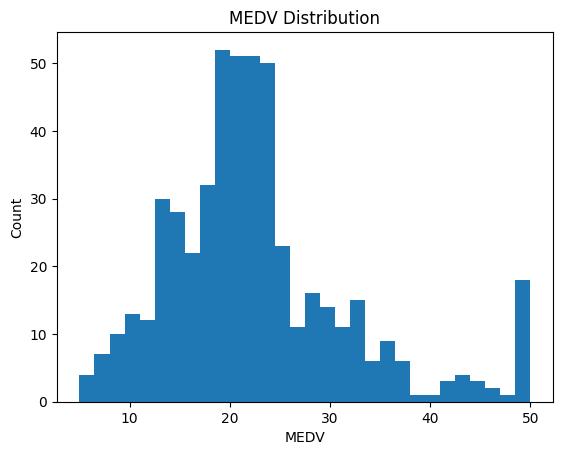

In [20]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(y, bins=30)
plt.title("MEDV Distribution")
plt.xlabel("MEDV")
plt.ylabel("Count")
plt.show()

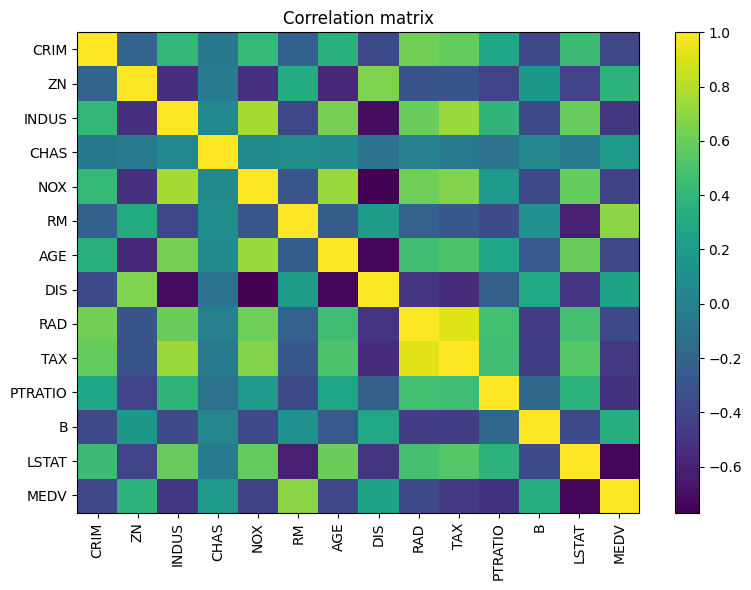

In [24]:
corr = df.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

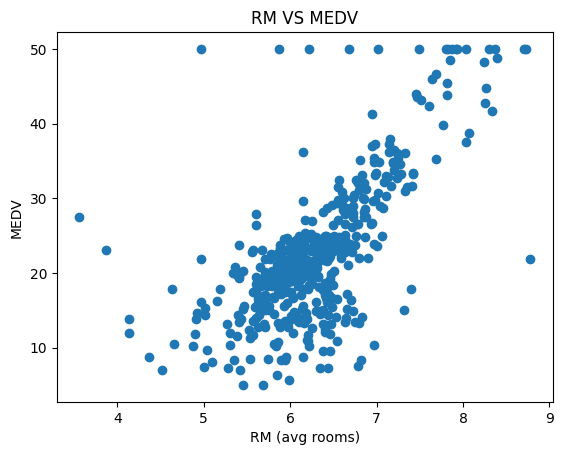

In [25]:
plt.figure()
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('RM (avg rooms)')
plt.ylabel('MEDV')
plt.title('RM VS MEDV')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse, "R2", r2)

RMSE: 4.999938478631852 R2 0.6591013893903506


In [29]:
from sklearn.model_selection import cross_val_score
scores = -cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_squared_error')
print("CV Rmse 5-fold", np.sqrt(scores).mean(), "+-", np.sqrt(scores).std())


CV Rmse 5-fold 5.8658197875584985 +- 1.823845632958566


In [30]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

pipe_ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
params = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(pipe_ridge, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gs.fit(X_train, y_train)
best = gs.best_estimator_
print("Best alpha:", gs.best_params_)
y_pred = best.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Best alpha: {'ridge__alpha': 10}
Test RMSE: 5.0045131172952715


In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))
# If you want XGBoost, install xgboost and try it similarly.


RF RMSE: 2.9668478477941513


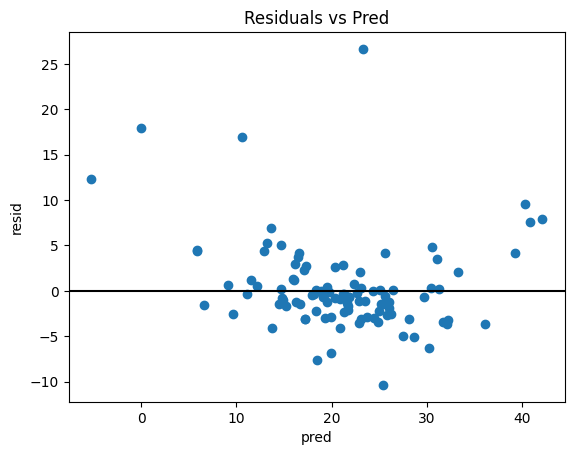

[('RM', np.float64(0.5620046249578172)), ('LSTAT', np.float64(0.24402030605530334)), ('DIS', np.float64(0.056084132465295214)), ('CRIM', np.float64(0.044493366376661674)), ('TAX', np.float64(0.01801953765006238)), ('NOX', np.float64(0.017693558180414858)), ('PTRATIO', np.float64(0.017474477220586117)), ('AGE', np.float64(0.013269608176843493)), ('B', np.float64(0.013024662125587292)), ('INDUS', np.float64(0.006651537044508289)), ('RAD', np.float64(0.004897957643491187)), ('ZN', np.float64(0.0013639608856126832)), ('CHAS', np.float64(0.001002271217816319))]


In [32]:
residuals = y_test - y_pred
plt.figure(); plt.scatter(y_pred, residuals); plt.axhline(0, color='k'); plt.xlabel('pred'); plt.ylabel('resid'); plt.title('Residuals vs Pred'); plt.show()

# feature importances for RF
importances = rf.feature_importances_
feat_importance = sorted(zip(X.columns, importances), key=lambda x: -x[1])
print(feat_importance)


In [33]:
import joblib, os
os.makedirs('models', exist_ok=True)
joblib.dump(best, 'models/best_model.pkl')  # best from GridSearch


['models/best_model.pkl']